<a href="https://colab.research.google.com/github/s-r-aman/machine_learning_playground/blob/master/fastdotai/blue_book_for_bulldozer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data

In [1]:
!pip install gdown

In [0]:
link = 'https://drive.google.com/uc?id=1TsAIFPQGHMTFPmH_M0Fp0Of47x-wDCaZ'

In [3]:
!gdown {link}

Downloading...
From: https://drive.google.com/uc?id=1TsAIFPQGHMTFPmH_M0Fp0Of47x-wDCaZ
To: /content/bluebook-for-bulldozers.zip
50.8MB [00:00, 122MB/s] 


In [0]:
!unzip bluebook-for-bulldozers.zip

Archive:  bluebook-for-bulldozers.zip
  inflating: TrainAndValid.csv       
  inflating: Train.zip               
  inflating: Train.7z                
  inflating: Valid.7z                
  inflating: Test.csv                
  inflating: Machine_Appendix.csv    
  inflating: median_benchmark.csv    
  inflating: ValidSolution.csv       
  inflating: TrainAndValid.7z        
  inflating: random_forest_benchmark_test.csv  
  inflating: Valid.zip               
  inflating: Data Dictionary.xlsx    
  inflating: TrainAndValid.zip       
  inflating: Valid.csv               


# Installing and Importing Libs

In [4]:
!pip install fastai==0.7 IPython

    100% |████████████████████████████████| 122kB 3.5MB/s 
    100% |████████████████████████████████| 3.6MB 7.6MB/s 
    100% |████████████████████████████████| 184kB 11.4MB/s 
    100% |████████████████████████████████| 1.5MB 18.7MB/s 
    100% |████████████████████████████████| 496.4MB 29kB/s 
    100% |████████████████████████████████| 61kB 21.6MB/s 
    100% |████████████████████████████████| 102kB 28.9MB/s 
    100% |████████████████████████████████| 12.5MB 2.0MB/s 
    100% |████████████████████████████████| 81kB 24.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built bcolz feather-format
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
mizani 0.5.3 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.

In [0]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import pandas as pd

#Loading Data

In [0]:
PATH = '/'

In [0]:
df = pd.read_csv('TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [0]:
def display_all(df):
  with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
    display(df)

In [0]:
display(df.tail().T)

,412693,412694,412695,412696,412697
SalesID,6333344,6333345,6333347,6333348,6333349
SalePrice,10000,10500,12500,10000,13000
MachineID,1919201,1882122,1944213,1794518,1944743
ModelID,21435,21436,21435,21435,21436
datasource,149,149,149,149,149
auctioneerID,2,2,2,2,2
YearMade,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2012-03-07 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00


In [0]:
df.describe(include = 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,412698,NaN,NaN,NaN,NaN,NaN,2.01116e+06,1.08007e+06,1.13925e+06,1.4219e+06,1.64585e+06,2.26101e+06,6.33335e+06
SalePrice,412698,NaN,NaN,NaN,NaN,NaN,31215.2,23141.7,4750,14500,24000,40000,142000
MachineID,412698,NaN,NaN,NaN,NaN,NaN,1.23006e+06,453953,0,1.08859e+06,1.2844e+06,1.47808e+06,2.48633e+06
ModelID,412698,NaN,NaN,NaN,NaN,NaN,6947.2,6280.82,28,3261,4605,8899,37198
datasource,412698,NaN,NaN,NaN,NaN,NaN,135.169,9.64675,121,132,132,136,173
auctioneerID,392562,NaN,NaN,NaN,NaN,NaN,6.58527,17.1584,0,1,2,4,99
YearMade,412698,NaN,NaN,NaN,NaN,NaN,1899.05,292.19,1000,1985,1995,2001,2014
MachineHoursCurrentMeter,147504,NaN,NaN,NaN,NaN,NaN,3522.99,27169.9,0,0,0,3209,2.4833e+06
UsageBand,73670,3,Medium,35832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,412698,4013,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2012-04-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.SalePrice = np.log(df.SalePrice)

# Initial Processing

In [0]:
m = RandomForestRegressor(n_jobs=-1)

In [0]:
m.fit(df.drop('SalePrice', axis=1), df.SalePrice)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored

In [0]:
# The above thing was supposed to fail because the string values
add_datepart(df, 'saledate')

In [0]:
display_all(df.tail().T)

,412693,412694,412695,412696,412697
SalesID,6333344,6333345,6333347,6333348,6333349
SalePrice,9.21034,9.25913,9.43348,9.21034,9.4727
MachineID,1919201,1882122,1944213,1794518,1944743
ModelID,21435,21436,21435,21435,21436
datasource,149,149,149,149,149
auctioneerID,2,2,2,2,2
YearMade,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,30NX,30NX2,30NX,30NX,30NX2


In [0]:
??train_cats

In [0]:
train_cats(df)

In [0]:
display_all(df.tail().T)

,412693,412694,412695,412696,412697
SalesID,6333344,6333345,6333347,6333348,6333349
SalePrice,9.21034,9.25913,9.43348,9.21034,9.4727
MachineID,1919201,1882122,1944213,1794518,1944743
ModelID,21435,21436,21435,21435,21436
datasource,149,149,149,149,149
auctioneerID,2,2,2,2,2
YearMade,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,30NX,30NX2,30NX,30NX,30NX2


In [0]:
df.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [0]:
df.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [0]:
df.UsageBand.cat.codes

0         1
1         1
2         0
3         0
4         2
5         1
6         0
7         0
8         1
9         2
10        2
11        1
12       -1
13        2
14        1
15        2
16        1
17       -1
18        1
19        2
20        2
21        2
22        1
23        0
24        2
25        2
26        1
27       -1
28        1
29        2
         ..
412668   -1
412669   -1
412670   -1
412671   -1
412672   -1
412673   -1
412674   -1
412675   -1
412676   -1
412677   -1
412678   -1
412679   -1
412680   -1
412681   -1
412682   -1
412683   -1
412684   -1
412685   -1
412686   -1
412687   -1
412688   -1
412689   -1
412690   -1
412691   -1
412692   -1
412693   -1
412694   -1
412695   -1
412696   -1
412697   -1
Length: 412698, dtype: int8

In [0]:
df.UsageBand = df.UsageBand.cat.codes

In [0]:
df.UsageBand

0         1
1         1
2         0
3         0
4         2
5         1
6         0
7         0
8         1
9         2
10        2
11        1
12       -1
13        2
14        1
15        2
16        1
17       -1
18        1
19        2
20        2
21        2
22        1
23        0
24        2
25        2
26        1
27       -1
28        1
29        2
         ..
412668   -1
412669   -1
412670   -1
412671   -1
412672   -1
412673   -1
412674   -1
412675   -1
412676   -1
412677   -1
412678   -1
412679   -1
412680   -1
412681   -1
412682   -1
412683   -1
412684   -1
412685   -1
412686   -1
412687   -1
412688   -1
412689   -1
412690   -1
412691   -1
412692   -1
412693   -1
412694   -1
412695   -1
412696   -1
412697   -1
Name: UsageBand, Length: 412698, dtype: int8

In [0]:
df.isnull().sum().sort_index()/len(df)

Backhoe_Mounting            0.804428
Blade_Extension             0.937041
Blade_Type                  0.801610
Blade_Width                 0.937041
Coupler                     0.465277
Coupler_System              0.891024
Differential_Type           0.826595
Drive_System                0.740520
Enclosure                   0.000809
Enclosure_Type              0.937041
Engine_Horsepower           0.937041
Forks                       0.520921
Grouser_Tracks              0.891264
Grouser_Type                0.752378
Hydraulics                  0.200062
Hydraulics_Flow             0.891264
MachineHoursCurrentMeter    0.642586
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.803498
Pattern_Changer             0.752213
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.524851
Pushblock                   0.937041
Ride_Control                0.629928
Ripper                      0.740864
S

In [0]:
# os.makedirs('tmp', exist_ok=True)
df.to_feather('bulldozers-raw')

In [6]:
link_feather = 'https://drive.google.com/uc?id=13H0CnwtFoq8q300zwPnug00YuhMlNrRT'
!gdown {link_feather}

Downloading...
From: https://drive.google.com/uc?id=13H0CnwtFoq8q300zwPnug00YuhMlNrRT
To: /content/bulldozers-raw
71.7MB [00:00, 139MB/s] 


In [0]:
!ls

bluebook-for-bulldozers.zip  bulldozers-raw  sample_data


In [0]:
import feather

# ??feather.read_dataframe
df = feather.read_dataframe('bulldozers-raw')

In [8]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,1,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,1,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,2,S175,...,23,3,204,False,False,False,False,False,False,1248307200


# Preprocessing

In [0]:
dfx, y, nas = proc_df(df, 'SalePrice')

In [10]:
nas

{'MachineHoursCurrentMeter': 0.0, 'auctioneerID': 2.0}

In [11]:
m = RandomForestRegressor(n_jobs = -1)
m.fit(dfx, y)
m.score(dfx,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.983226395537162

In [0]:
df.shape

(412698, 65)

In [17]:

# def split_vals(a,n): return a[:n].copy(), a[n:].copy()

# n_valid = 12000  # same as Kaggle's test set size
# n_trn = len(df)-n_valid
# raw_train, raw_valid = split_vals(df, n_trn)
# X_train, X_valid = split_vals(dfx, n_trn)
# y_train, y_valid = split_vals(y, n_trn)

# X_train.shape, y_train.shape, X_valid.shape

def split_vals(n):
  def split_val(a): 
    return a[:n].copy(), a[n:].copy()
  return split_val

n_valid  = 12000
n_trn = len(df) - n_valid

give_sets = split_vals(n_trn)

raw_train, raw_valid = give_sets(df)
X_train, X_valid = give_sets(dfx)
y_train, y_valid = give_sets(y)
X_train.shape, y_train.shape, X_valid.shape

((400698, 66), (400698,), (12000, 66))

# Base Model

In [0]:
def rmse(x, y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
  res = [
      rmse(m.predict(X_train),y_train),
      rmse(m.predict(X_valid), y_valid),
      m.score(X_train, y_train),
      m.score(X_valid, y_valid)
  ]
  if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
  print(res)

In [20]:
m = RandomForestRegressor(n_jobs = -1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 51s, sys: 182 ms, total: 1min 51s
Wall time: 57.5 s
[0.08982587348860521, 0.26377074345618706, 0.98322267469649, 0.8724593767227553]


In [0]:
??proc_df
df_trn, y_trn, nas = proc_df(df, 'SalePrice', subset=30000, na_dict=nas)

In [0]:
give_vals = split_vals(20000)
X_train, _ = give_vals(df_trn)
y_train, _ = give_vals(y_trn)

In [29]:
y_train.shape

(20000,)

In [28]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.14 s, sys: 12 ms, total: 3.15 s
Wall time: 1.68 s
[0.11347237927759019, 0.4057257141845546, 0.9724128682386508, 0.6982409144713551]


#Single Tree

In [30]:
m = RandomForestRegressor(
    n_estimators=1,
    max_depth=3,
    bootstrap=False,
    n_jobs=-1
)
m.fit(X_train, y_train)
print_score(m)

[0.5233896615788126, 0.5867744304130682, 0.41308324669947416, 0.36884264248648946]


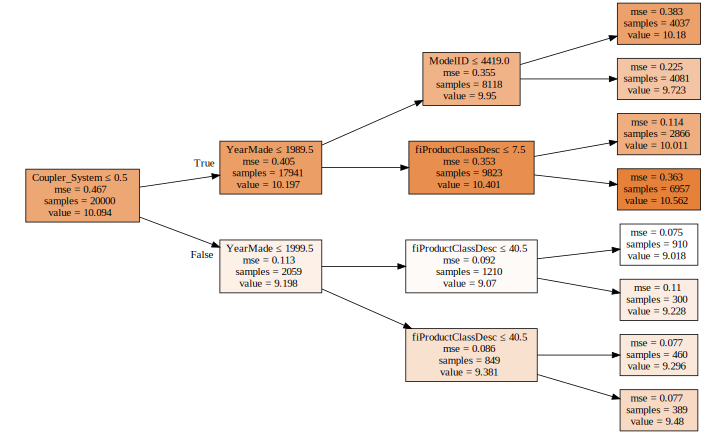

In [31]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [32]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[5.329070518200751e-17, 0.515571783489576, 1.0, 0.5127256283015006]


# Bagging

In [33]:

m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11364235201711416, 0.4050713428962591, 0.9723301596127526, 0.6992135086984759]


In [0]:
??np.stack

In [37]:
[t.predict(X_valid) for t in m.estimators_]

[array([10.71442, 10.71442, 10.47729, ...,  9.04782,  9.04782,  9.04782]),
 array([10.06476, 10.62133, 10.98529, ...,  9.04782,  9.04782,  9.04782]),
 array([10.59663, 10.59663, 10.59663, ...,  9.04782,  9.21034,  9.68034]),
 array([ 9.4727 , 10.71442, 10.71442, ..., 10.04325, 10.02127, 10.04325]),
 array([10.389  , 10.95954, 10.20359, ...,  9.25913,  9.25913,  9.68034]),
 array([10.83958, 10.4631 , 10.83958, ...,  9.21034,  9.15905,  9.9988 ]),
 array([10.91509, 10.64542, 10.91509, ...,  9.54681,  9.54681,  9.54681]),
 array([10.29215, 10.71442, 10.71442, ...,  9.90349,  9.90349,  9.90349]),
 array([10.34174, 10.5321 , 10.5321 , ...,  9.30565,  9.30565, 10.27505]),
 array([ 9.6486 , 10.5321 , 10.59663, ...,  9.9988 ,  9.51044,  9.9988 ])]

In [38]:
np.stack([t.predict(X_valid) for t in m.estimators_])

array([[10.71442, 10.71442, 10.47729, ...,  9.04782,  9.04782,  9.04782],
       [10.06476, 10.62133, 10.98529, ...,  9.04782,  9.04782,  9.04782],
       [10.59663, 10.59663, 10.59663, ...,  9.04782,  9.21034,  9.68034],
       ...,
       [10.29215, 10.71442, 10.71442, ...,  9.90349,  9.90349,  9.90349],
       [10.34174, 10.5321 , 10.5321 , ...,  9.30565,  9.30565, 10.27505],
       [ 9.6486 , 10.5321 , 10.59663, ...,  9.9988 ,  9.51044,  9.9988 ]])

In [34]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([10.71442, 10.06476, 10.59663,  9.4727 , 10.389  , 10.83958, 10.91509, 10.29215, 10.34174,  9.6486 ]),
 10.32746609113659,
 10.768484990022733)

In [40]:
preds.shape

(10, 12000)

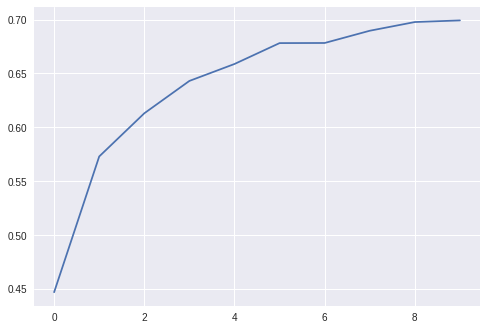

In [41]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);
